# Star Wars: The Last Survey

### Import Packages 

In [1]:
import pandas as pd
import numpy as np
import IPython
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
%matplotlib inline

import plotly.graph_objs as go
import plotly.offline as offline
from plotly import tools
import plotly.figure_factory as ff
offline.init_notebook_mode(connected = True)

In [61]:
url = "https://ia800304.us.archive.org/30/items/StarWarsTheImperialMarchDarthVadersTheme/Star%20Wars-%20The%20Imperial%20March%20%28Darth%20Vader%27s%20Theme%29.mp3"

IPython.display.Audio(url = url, autoplay=True)

### Load Dataset

In [2]:
## Specify column names
col_names = ['ID', 'Watched Any SW', 'Fan SW', 'Ep1 Seen', 'Ep2 Seen', 'Ep3 Seen', 'Ep4 Seen', 'Ep5 Seen', 'Ep6 Seen', 'Ep1 Rate', \
            'Ep2 Rate', 'Ep3 Rate', 'Ep4 Rate', 'Ep5 Rate', 'Ep6 Rate', 'Han Solo', 'Luke Skywalker', 'Princess Leia Organa', \
             'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett', \
             'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Who Shot First', 'Familiar EU', 'Fan EU', \
             'Fan StarTrek', 'Gender', 'Age', 'Income', 'Education', 'Location']

In [3]:
## Because data is from a survey the top two lines are weirdly formatted column names; drop and replace
df = pd.read_csv(r"StarWars.csv", skiprows = [0,1], header = None, names = col_names)

In [4]:
df.head()

,ID,Watched Any SW,Fan SW,Ep1 Seen,Ep2 Seen,Ep3 Seen,Ep4 Seen,Ep5 Seen,Ep6 Seen,Ep1 Rate,...,Yoda,Who Shot First,Familiar EU,Fan EU,Fan StarTrek,Gender,Age,Income,Education,Location
0,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
1,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
2,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
3,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1185.0,3.290126e+09,1.053050e+06,3.288373e+09,3.289450e+09,3.290146e+09,3.290813e+09,3.292880e+09
Ep1 Rate,834.0,3.733813e+00,1.656921e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Ep2 Rate,835.0,4.089820e+00,1.364268e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Ep3 Rate,834.0,4.345324e+00,1.396509e+00,1.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00
Ep4 Rate,835.0,3.271856e+00,1.826821e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00
Ep5 Rate,835.0,2.510180e+00,1.577215e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Ep6 Rate,835.0,3.044311e+00,1.664757e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00


In [6]:
df.columns

Index(['ID', 'Watched Any SW', 'Fan SW', 'Ep1 Seen', 'Ep2 Seen', 'Ep3 Seen',
       'Ep4 Seen', 'Ep5 Seen', 'Ep6 Seen', 'Ep1 Rate', 'Ep2 Rate', 'Ep3 Rate',
       'Ep4 Rate', 'Ep5 Rate', 'Ep6 Rate', 'Han Solo', 'Luke Skywalker',
       'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi',
       'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett',
       'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda',
       'Who Shot First', 'Familiar EU', 'Fan EU', 'Fan StarTrek', 'Gender',
       'Age', 'Income', 'Education', 'Location'],
      dtype='object')

### Clean and Prepare Data

Drop rows where first column is 'Yes' and remaining columns are NaN. People who havnt seen Star Wars are not fans and cannot rank the movies, however assuming the people who answered 'Yes' are not fans is incorrect.

In [7]:
df.loc[pd.isnull(df['Fan SW'])].head(2)

,ID,Watched Any SW,Fan SW,Ep1 Seen,Ep2 Seen,Ep3 Seen,Ep4 Seen,Ep5 Seen,Ep6 Seen,Ep1 Rate,...,Yoda,Who Shot First,Familiar EU,Fan EU,Fan StarTrek,Gender,Age,Income,Education,Location
0,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
9,3292637870,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.loc[(~pd.isnull(df['Fan SW'])) | ~(df['Watched Any SW'] == 'Yes')]

Some columns contain Yes/No answers. Swap these columns over to booleans for cleaner dataset. We will also fill in remaining NaNs with 'No'. Again remaining NaN values are for people who have not seen star wars so we can assume they are not fans ect.

In [9]:
## List of columns to swap
yes_no_answers = ['Watched Any SW', 'Fan SW', 'Familiar EU', 'Fan EU', 'Fan StarTrek']
answer_to_bool = {'Yes' : True, 'No' : False}

In [10]:
for col in yes_no_answers:
    ## Remaining NaNs should be 'No' in these columns
    df[col].fillna('No', inplace = True)
    df.loc[:, col] = df.loc[:, col].map(answer_to_bool) ## convert to Bool
    

Fix the "Who shot first" question. This is similar to Yes/No but has different verbiage so it requires different map. Once again we can assume people who havn't seen the films would not understand the question.

In [11]:
df.loc[:, 'Who Shot First'].fillna('I don\'t understand this question', inplace = True)
shot_map = {'I don\'t understand this question' : '0', 'Greedo' : '1', 'Han' : '2'}
df.loc[:, 'Who Shot First'] = df.loc[:, 'Who Shot First'].map(shot_map)

"Episode Seen" columns currently have the name of the movie if the person has seen it. We need to swap this to bools as well, where NaN is False and other is True.

In [12]:
seen_list = ['Ep1 Seen', 'Ep2 Seen', 'Ep3 Seen', 'Ep4 Seen', 'Ep5 Seen', 'Ep6 Seen']
## Cast to bool
for col in seen_list:
    df.loc[:, col] = df.loc[:, col].apply(lambda x: x if pd.isnull(x) else True)
    df.loc[:, col].fillna(False, inplace = True)

If there is no rating then we will specify an "unrated" value of 0.

In [13]:
ratings = ['Ep1 Rate', 'Ep2 Rate', 'Ep3 Rate', 'Ep4 Rate', 'Ep5 Rate', 'Ep6 Rate']
df[ratings] = df[ratings].fillna(0)

In this dataset if someone has not seen the movie there will still be a rank for the movie. Because we are specifing an "unranked" datapoint already (0), we can just identify and swap these points to 0.

In [14]:
df.loc[df['Ep3 Seen'] == False][seen_list+ratings].iloc[8]

Ep1 Seen     True
Ep2 Seen    False
Ep3 Seen    False
Ep4 Seen     True
Ep5 Seen     True
Ep6 Seen     True
Ep1 Rate        4
Ep2 Rate        6
Ep3 Rate        5
Ep4 Rate        3
Ep5 Rate        1
Ep6 Rate        2
Name: 49, dtype: object

In [15]:
## Specify dictionary to tie seen/ranks together
seen_ranked_dict = {'Ep1 Seen' : 'Ep1 Rate', 'Ep2 Seen' : 'Ep2 Rate', 'Ep3 Seen' : 'Ep3 Rate', \
                    'Ep4 Seen': 'Ep4 Rate', 'Ep5 Seen' : 'Ep5 Rate', 'Ep6 Seen' : 'Ep6 Rate'}

In [16]:
## Simple function to check if film is seen and change rating if so
def seen_check(seen, rank):
    if seen:
        return rank
    else:
        return 0

In [17]:
## Use dictionary to iterate over columns and apply func
for key, value in seen_ranked_dict.items():

    df.loc[:, value] = df.loc[:, [key, value]].apply(lambda x: seen_check(*x), axis = 1)

In [18]:
df.loc[df['Ep3 Seen'] == False][seen_list+ratings].iloc[8]

Ep1 Seen     True
Ep2 Seen    False
Ep3 Seen    False
Ep4 Seen     True
Ep5 Seen     True
Ep6 Seen     True
Ep1 Rate        4
Ep2 Rate        0
Ep3 Rate        0
Ep4 Rate        3
Ep5 Rate        1
Ep6 Rate        2
Name: 49, dtype: object

We are trying to predict the Income column, so any rows that have NaN for Income will need to be dropped

In [19]:
## Drop Nan of target column
df = df[~pd.isnull(df['Income'])]

### Data Visualization

Visualize distribution of Income column. Important to determine if classification column is evenly distributed or if we are dealing with an imbalanced dataset.

In [20]:
def income_distribution():
    
    inc_sort_list = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+']
    
    data = [go.Bar(
                x = inc_sort_list,
                y = df['Income'].value_counts()[inc_sort_list]
    )]
    
    layout = go.Layout(
                    title = 'Income Distribution',
                    margin = go.Margin(b=100),
                    xaxis=dict(
                            title='Income',
                            showticklabels=False,
                    ),
                    yaxis=dict(
                            title='Count',
                            showticklabels=True
                    ))
    
    fig = go.Figure(data = data, layout = layout)    
    
    offline.iplot(fig)

income_distribution()

Now that we know the general distribution of the Income column, we will explore if there is any seperation between the different classifications depending on a persons survey question. To start we will plot a stacked bar chart of the Yes/No questions and see if people in different income brackets generally have different answers.

In [21]:
def stacked_bar(col):
    
    inc_sort_list = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+']
    
    percent_no = round(df[df[col] == True]['Income'].value_counts()[inc_sort_list] / \
                       df['Income'].value_counts()[inc_sort_list] * 100)
    
    percent_no = ['{0:.0f}%'.format(x) for x in percent_no]
    
    trace1 = go.Bar(
        x = inc_sort_list,
        y = df[df[col] == True]['Income'].value_counts()[inc_sort_list],
        name = 'Yes',
        marker=dict(
        color='rgb(40,0,150)'
            )
    )
    
    trace2 = go.Bar(
        x = inc_sort_list,
        y = df[df[col] == False]['Income'].value_counts()[inc_sort_list],
        name = 'No',
        text = percent_no,
        textposition='auto',
        marker=dict(
            color='rgb(0,153,0)'
                )
    )
    
    data = [trace1, trace2]
    
    layout = go.Layout(
                barmode='stack',
                title = col,
                autosize=False,
                width=750,
                height=400,
                xaxis=dict(
                        title='Income',
                        showticklabels=False)
                )
    
    fig = go.Figure(data = data, layout = layout)
    
    offline.iplot(fig)

In [22]:
for col in yes_no_answers:
    stacked_bar(col)

Explore relationship between movie ratings and income.

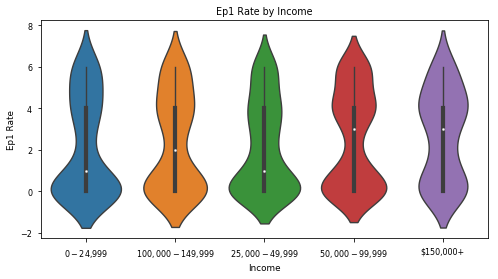

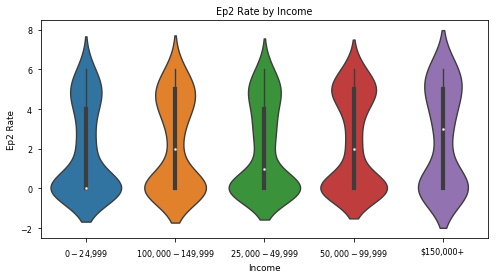

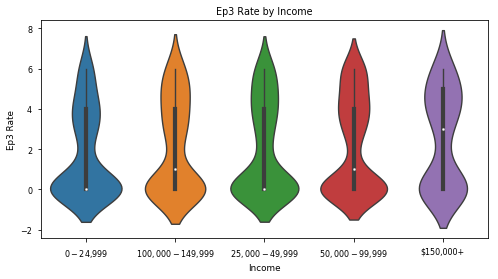

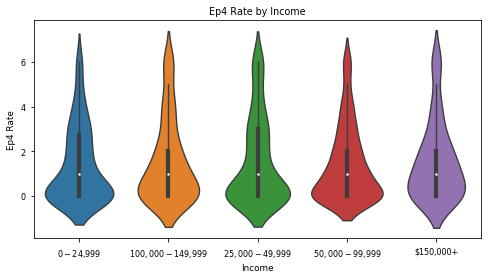

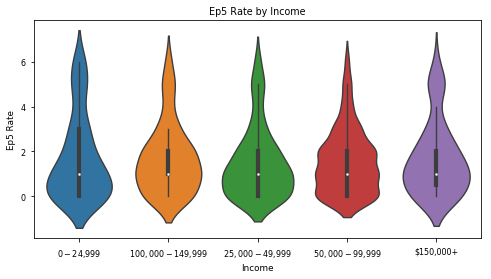

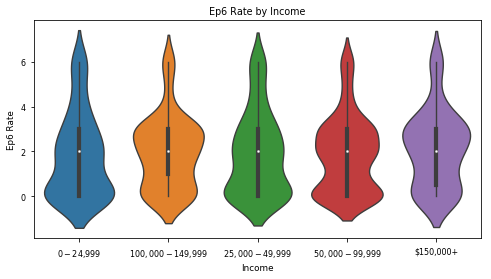

In [23]:
for col in ratings:
    
    fig, ax = plt.subplots(1, figsize = (8,4))
    
    sns.violinplot(x = df['Income'], y = df[col], ax = ax)
    
    ax.set_title(col + ' by Income')

There seems to be a trend that people who are in higher income brackets have both seen and like Star Wars more than those in lower brackets. The correlation does not seem to be huge however and it may not be enough for our model to distinguish the correct classification.

# Machine Learning

### Import scikit packages

In [24]:
from sklearn.model_selection import train_test_split

## Different models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
X = df.loc[: , ['Watched Any SW', 'Fan SW', 'Ep1 Seen', 'Ep2 Seen', 'Ep3 Seen', \
       'Ep4 Seen', 'Ep5 Seen', 'Ep6 Seen', 'Ep1 Rate', 'Ep2 Rate', 'Ep3 Rate', \
       'Ep4 Rate', 'Ep5 Rate', 'Ep6 Rate', 'Who Shot First', 'Familiar EU', 'Fan EU', 'Fan StarTrek']]

y = df.loc[:, 'Income']

For the ratings, we do not want the model to think that a '6' rating is better than a '1' rating, or that a '2' and '3' add up to '5'. To avoid this issue we will convert the columns to strings, which will than be seperated when we use the get_dummies function.

In [26]:
X.loc[: , ratings] = X.loc[: , ratings].astype(str)

In [27]:
X = pd.get_dummies(X)

In [28]:
def algorithm_checker(ind, dep, model):
    
    print(str(model))
    
    ## Split data, fit model
    X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size = .3, random_state = 1)
    
    model.fit(X_train, y_train)
    
    ## Print general accuracy stats
    print("Accuracy:", model.score(X_test, y_test))
    print("Cross Val:", cross_val_score(model, X, y, cv = 5).mean())
    
    ## Confusion matrix, classification report
    scores = model.predict(X_test)
    labels = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+']
    labels_test = [1,2,3,4,5]
    cm = confusion_matrix(y_test, scores, labels)
    
    print("CLASSIFICATION REPORT")
    print(classification_report(y_test, scores))
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, ax = ax,
                xticklabels = labels,
                yticklabels = labels)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

In [29]:
## Different models were tested
tree = DecisionTreeClassifier(max_depth = 20)
bayes = GaussianNB()
kmeans = KNeighborsClassifier(n_neighbors = 14)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy: 0.251937984496
Cross Val: 0.2529534412
CLASSIFICATION REPORT
                     precision    recall  f1-score   support

       $0 - $24,999       0.30      0.21      0.25        42
$100,000 - $149,999       0.07      0.09      0.08        33
          $150,000+       0.15      0.16      0.16        25
  $25,000 - $49,999       0.16      0.12      0.13        59
  $50,000 - $99,999       0.37      0.42      0.39        99

        avg / total       0.25      0.25      0.25       258



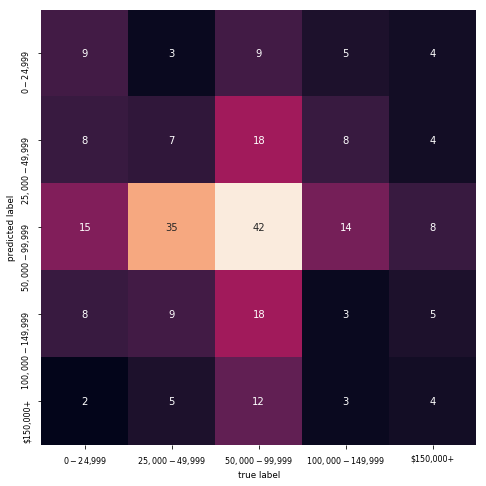

GaussianNB(priors=None)
Accuracy: 0.217054263566
Cross Val: 0.151920530843
CLASSIFICATION REPORT
                     precision    recall  f1-score   support

       $0 - $24,999       0.21      0.36      0.26        42
$100,000 - $149,999       0.05      0.09      0.07        33
          $150,000+       0.17      0.28      0.21        25
  $25,000 - $49,999       0.25      0.10      0.14        59
  $50,000 - $99,999       0.40      0.25      0.31        99

        avg / total       0.27      0.22      0.22       258



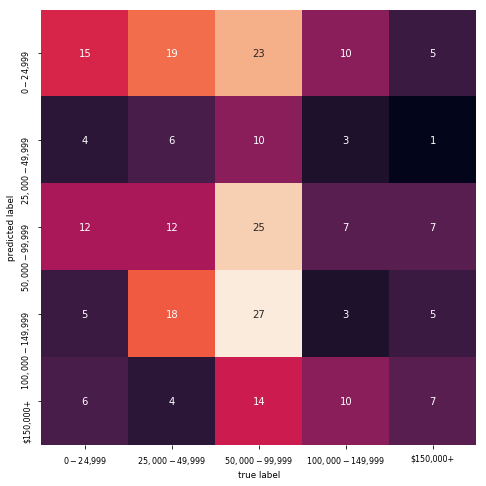

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')
Accuracy: 0.294573643411
Cross Val: 0.292423699231
CLASSIFICATION REPORT
                     precision    recall  f1-score   support

       $0 - $24,999       0.14      0.07      0.10        42
$100,000 - $149,999       0.08      0.09      0.09        33
          $150,000+       0.29      0.08      0.12        25
  $25,000 - $49,999       0.27      0.37      0.31        59
  $50,000 - $99,999       0.41      0.46      0.44        99

        avg / total       0.28      0.29      0.28       258



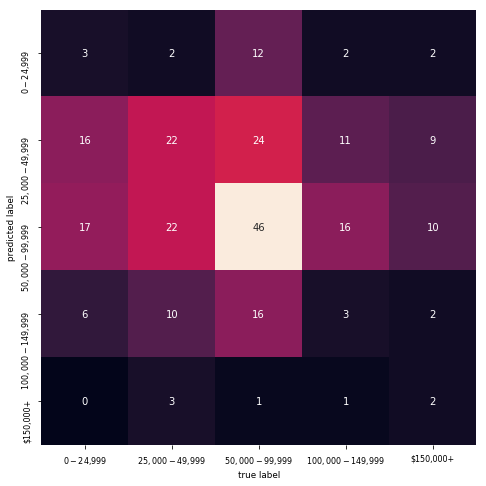

In [30]:
for model in [tree,bayes,kmeans]:    
    algorithm_checker(X, y, model)

Model Notes

- All Models generally like to predict most on the 50-99k classification- inbalanced dataset
- Tree Model
    - At low depth tree bets all on 50-99k range
    - When max depth is increased we can start to see some seperation
    - Still performs the worst of all three models
- Gaussian Bayes Model
    - Performs much better than tree
    - Does not put everything on 50-99k
    - Still very inaccurate   
- KMeans
    - Most accurate model
    - Still bets majority onto 50-99k range
    - Sweet spot for n neighbors right around 14
        - If too few neighbors model predicts all on 50-99K range
        - Too few and model becomes less accurate
 

### Conclusion

We had some small success in predicting a person's income bracket. Our best model showed 29% accuracy which is still better than guessing which would be around 20%. With this being said none of the models we tested really performs extraordinarily. I believe this is because in the end people's preference towards Star Wars just does not have a very high correlation with income. It would interesting to see if we had a bigger set and could train the model on more data, if the models would be able to identify slight differences better.